# Imports & Merging

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tld import get_tld
import warnings
import re
import os

In [8]:
# Counts the number of available websites in the dataset, before cleanup.
path = 'data\csv\\'
files = [file for file in os.listdir(path) if file.endswith(".csv")]

output = pd.Series(name="Rows", dtype=int)
for file in files:
    df = pd.read_csv(os.path.join(path, file))
    output.at[file.replace(".csv", "")] = df.shape[0]
output.at["Total"] = output.sum()

In [9]:
output

database0-500            436
database1000-2000        865
database10000-10200      147
database10200-10300       84
database10300-10400       81
                       ...  
database9600-9700         82
database9700-9800         81
database9800-9900         80
database9900-10000        77
Total                  52422
Name: Rows, Length: 359, dtype: int64

In [55]:
# Combines all csv files in data\csv\ into one dataframe.
warnings.filterwarnings('ignore') # to ignore a useless deprecated method warning
result = Path('data\csv\\').glob('*.csv')
csvfiles = sorted(result, key = lambda x: [int(k) if k.isdigit() else k for k in re.split('([0-9]+)', x.stem)])

df = pd.DataFrame()
for files in csvfiles:
    df = df.append(pd.read_csv(files))
df.to_csv('data\datasets\main.csv')

In [56]:
df

,URL,Green Hosting,Bytes,Cleaner Than %,Stats_Adjusted Bytes,Stats_Energy,Stats_CO2_Grid_Grams,Stats_CO2_Grid_Litres,Stats_CO2_Renewable_Grams,Stats_CO2_Renewable_Litres
https://www.google.com/,True,170821,0.96,1.289699e+05,0.000097,0.043003,0.023918,0.037282,0.020736,1651677726
https://www.youtube.com/,True,3543405,0.32,2.675271e+06,0.002018,0.892021,0.496142,0.773354,0.430140,1651668187
https://www.facebook.com/,True,435816,0.91,3.290411e+05,0.000248,0.109713,0.061022,0.095118,0.052904,1651677735
https://www.netflix.com/fr-en/,True,2004776,0.54,1.513606e+06,0.001142,0.504685,0.280706,0.437546,0.243363,1651677748
https://www.microsoft.com/fr-fr/,unknown,768548,0.80,5.802537e+05,0.000438,0.193475,0.107611,0.167737,0.093295,1651677764
...,...,...,...,...,...,...,...,...,...,...
https://genericsildenafil.online/,True,35581,0.99,2.686365e+04,0.000020,0.008957,0.004982,0.007766,0.004319,1653145171
https://www.myamcat.com/,unknown,37919212,0.01,2.862901e+07,0.021597,9.545830,5.309390,8.275932,4.603073,1653145180
https://nobaproject.com/,True,1859882,0.57,1.404211e+06,0.001059,0.468209,0.260418,0.405922,0.225774,1653145161
https://govst.edu/,unknown,19112240,0.03,1.442974e+07,0.010885,4.811339,2.676067,4.171279,2.320065,1653145213


In [57]:
df = pd.read_csv('data\datasets\main.csv', index_col=None)

# Editing

In [58]:
#Basic cleanup, column renaming, dropping duplicates.

In [59]:
df.columns = ['URL', 'Green Hosting', 'Bytes', 'Cleaner Than %', "Statistics: Adjusted Bytes", "Statistics: Energy (KWG)", "Statistics: CO2 Grams, Grid", "Statistics: CO2 Litres, Grid", "Statistics: CO2 Grams, Renewable", "Statistics: CO2 Litres, Renewable", "Gathered At:"]

In [60]:
df = df.drop_duplicates(subset=['URL'], keep='first')

In [61]:
df.isna().sum()

URL                                  0
Green Hosting                        0
Bytes                                0
Cleaner Than %                       0
Statistics: Adjusted Bytes           0
Statistics: Energy (KWG)             0
Statistics: CO2 Grams, Grid          0
Statistics: CO2 Litres, Grid         0
Statistics: CO2 Grams, Renewable     0
Statistics: CO2 Litres, Renewable    0
Gathered At:                         0
dtype: int64

In [62]:
# There are no nulls/na's in the dataset.

In [63]:
# Converts to values between 0 and 100, originally it was between 0 and 1.
df["Cleaner Than %"] = df["Cleaner Than %"].apply(lambda x: x*100)

In [64]:
# Converts unix timestamp to datetime.
df["Gathered At:"] = pd.to_datetime(df['Gathered At:'], unit='s')

In [66]:
df.to_csv('data\datasets\main.csv')

In [89]:
# Small change for a website entry which is an ip address.
df.at[48594,'URL']='http://www.nontonanimeid.moe/'

In [ ]:
# Used only to make a csv file which is used by get_requester to parse the websites.
df.iloc[0:5000].to_csv('test_data.csv', index=False, header=False)

# Analysis

In [42]:
# Basic aanalysis of the data, some were for exploration purposes, others are used in the thesis.

In [40]:
df["Green Hosting"].value_counts()

unknown    25708
True       24326
Name: Green Hosting, dtype: int64

In [41]:
df.describe()

,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable"
count,5.003400e+04,50034.000000,5.003400e+04,5.003400e+04,50034.000000,50034.000000,50034.000000,50034.000000
mean,3.696112e+06,49.154275,2.790564e+06,2.105122e-03,0.930464,0.517524,0.806683,0.448677
std,5.847474e+06,28.671194,4.414843e+06,3.330431e-03,1.472050,0.818754,1.276221,0.709834
min,1.680000e+02,0.000000,1.268400e+02,9.568445e-08,0.000042,0.000024,0.000037,0.000020
25%,1.055308e+06,25.000000,7.967572e+05,6.010507e-04,0.265664,0.147763,0.230323,0.128105
50%,2.236138e+06,46.000000,1.688285e+06,1.273593e-03,0.562928,0.313101,0.488041,0.271448
75%,4.229322e+06,73.000000,3.193138e+06,2.408812e-03,1.064695,0.592183,0.923057,0.513404
max,3.040842e+08,100.000000,2.295836e+08,1.731912e-01,76.550528,42.577404,66.366883,36.913260


In [43]:
df.mean()

Bytes                                3.696112e+06
Cleaner Than %                       4.915428e+01
Statistics: Adjusted Bytes           2.790564e+06
Statistics: Energy (KWG)             2.105122e-03
Statistics: CO2 Grams, Grid          9.304637e-01
Statistics: CO2 Litres, Grid         5.175239e-01
Statistics: CO2 Grams, Renewable     8.066826e-01
Statistics: CO2 Litres, Renewable    4.486769e-01
dtype: float64

In [44]:
df.median()

Bytes                                2.236138e+06
Cleaner Than %                       4.600000e+01
Statistics: Adjusted Bytes           1.688285e+06
Statistics: Energy (KWG)             1.273593e-03
Statistics: CO2 Grams, Grid          5.629283e-01
Statistics: CO2 Litres, Grid         3.131007e-01
Statistics: CO2 Grams, Renewable     4.880410e-01
Statistics: CO2 Litres, Renewable    2.714484e-01
dtype: float64

In [45]:
df.sum()

URL                                  https://www.google.com/https://www.youtube.com...
Green Hosting                        TrueTrueTrueTrueunknownTrueunknownunknownunkno...
Bytes                                                                     184931250547
Cleaner Than %                                                               2459385.0
Statistics: Adjusted Bytes                                         139623094162.984985
Statistics: Energy (KWG)                                                    105.327653
Statistics: CO2 Grams, Grid                                               46554.822635
Statistics: CO2 Litres, Grid                                               25893.79235
Statistics: CO2 Grams, Renewable                                          40361.556638
Statistics: CO2 Litres, Renewable                                         22449.097802
dtype: object

In [46]:
max = df["Statistics: Adjusted Bytes"].max()
df[df["Statistics: Adjusted Bytes"] == max]

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Gathered At:
41527,https://lematin.ma/,True,304084175,0.0,2.295836e+08,0.173191,76.550528,42.577404,66.366883,36.91326,2022-05-15 12:40:01


In [47]:
min = df["Statistics: Adjusted Bytes"].min()
df[df["Statistics: Adjusted Bytes"] == min]

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Gathered At:
40633,https://bloog.pl/,unknown,168,100.0,126.84,9.568445e-08,0.000042,0.000024,0.000037,0.00002,2022-05-15 10:05:15


In [48]:
# Used for the 'top and bottom 1000' section of the thesis.
dfmax = df.sort_values(['Bytes'], ascending=False).groupby('Bytes').tail(2)
dfmin = df.sort_values(['Bytes'], ascending=True).groupby('Bytes').tail(2)

In [78]:
# Used for the 'Hosting type' section of the thesis.
trues = df[df['Green Hosting'] == 'True']
unknowns = df[df['Green Hosting'] != 'True']
print(trues.URL.count())
print(unknowns.URL.count())

24326
25708


In [85]:
# This is the data used in the bigger table of that section. The 100 mil value is for the >=100mb column. 
# To get the >=50mb and the other values simply change to the needed value.
trues = trues[trues['Bytes'] >= 100000000]
print(trues.Bytes.sum() / 1e6)
print(trues.Bytes.count())
print(trues.Bytes.sum() / 1e6 / trues.Bytes.count())

897.840743
5
179.5681486


In [86]:
# Same goes for this part.
unknowns = unknowns[unknowns['Bytes'] >= 100000000]
print(unknowns.Bytes.sum() / 1e6)
print(unknowns.Bytes.count())
print(unknowns.Bytes.sum() / 1e6 / unknowns.Bytes.count())

777.391624
5
155.4783248


# Tables

### For "Overview" & "Per Domain"

In [90]:
# Adds a new column with the TLD type.
df['tld'] = df['URL'].apply(lambda x: get_tld(x))

In [91]:
df['tld'] = df['tld'].astype(str)

In [92]:
# Used for a table mentioning all TLD's.
tld = df['tld'].value_counts()

com         27873
org          3868
net          2065
edu           921
ru            914
            ...  
or.id           1
com.es          1
xn--p1ai        1
garden          1
edu.mo          1
Name: tld, Length: 716, dtype: int64

In [93]:
# List used for the overview section where the top 40 TLD's are plotted.
df1 = df.groupby('tld').filter(lambda d: len(d) > 100)

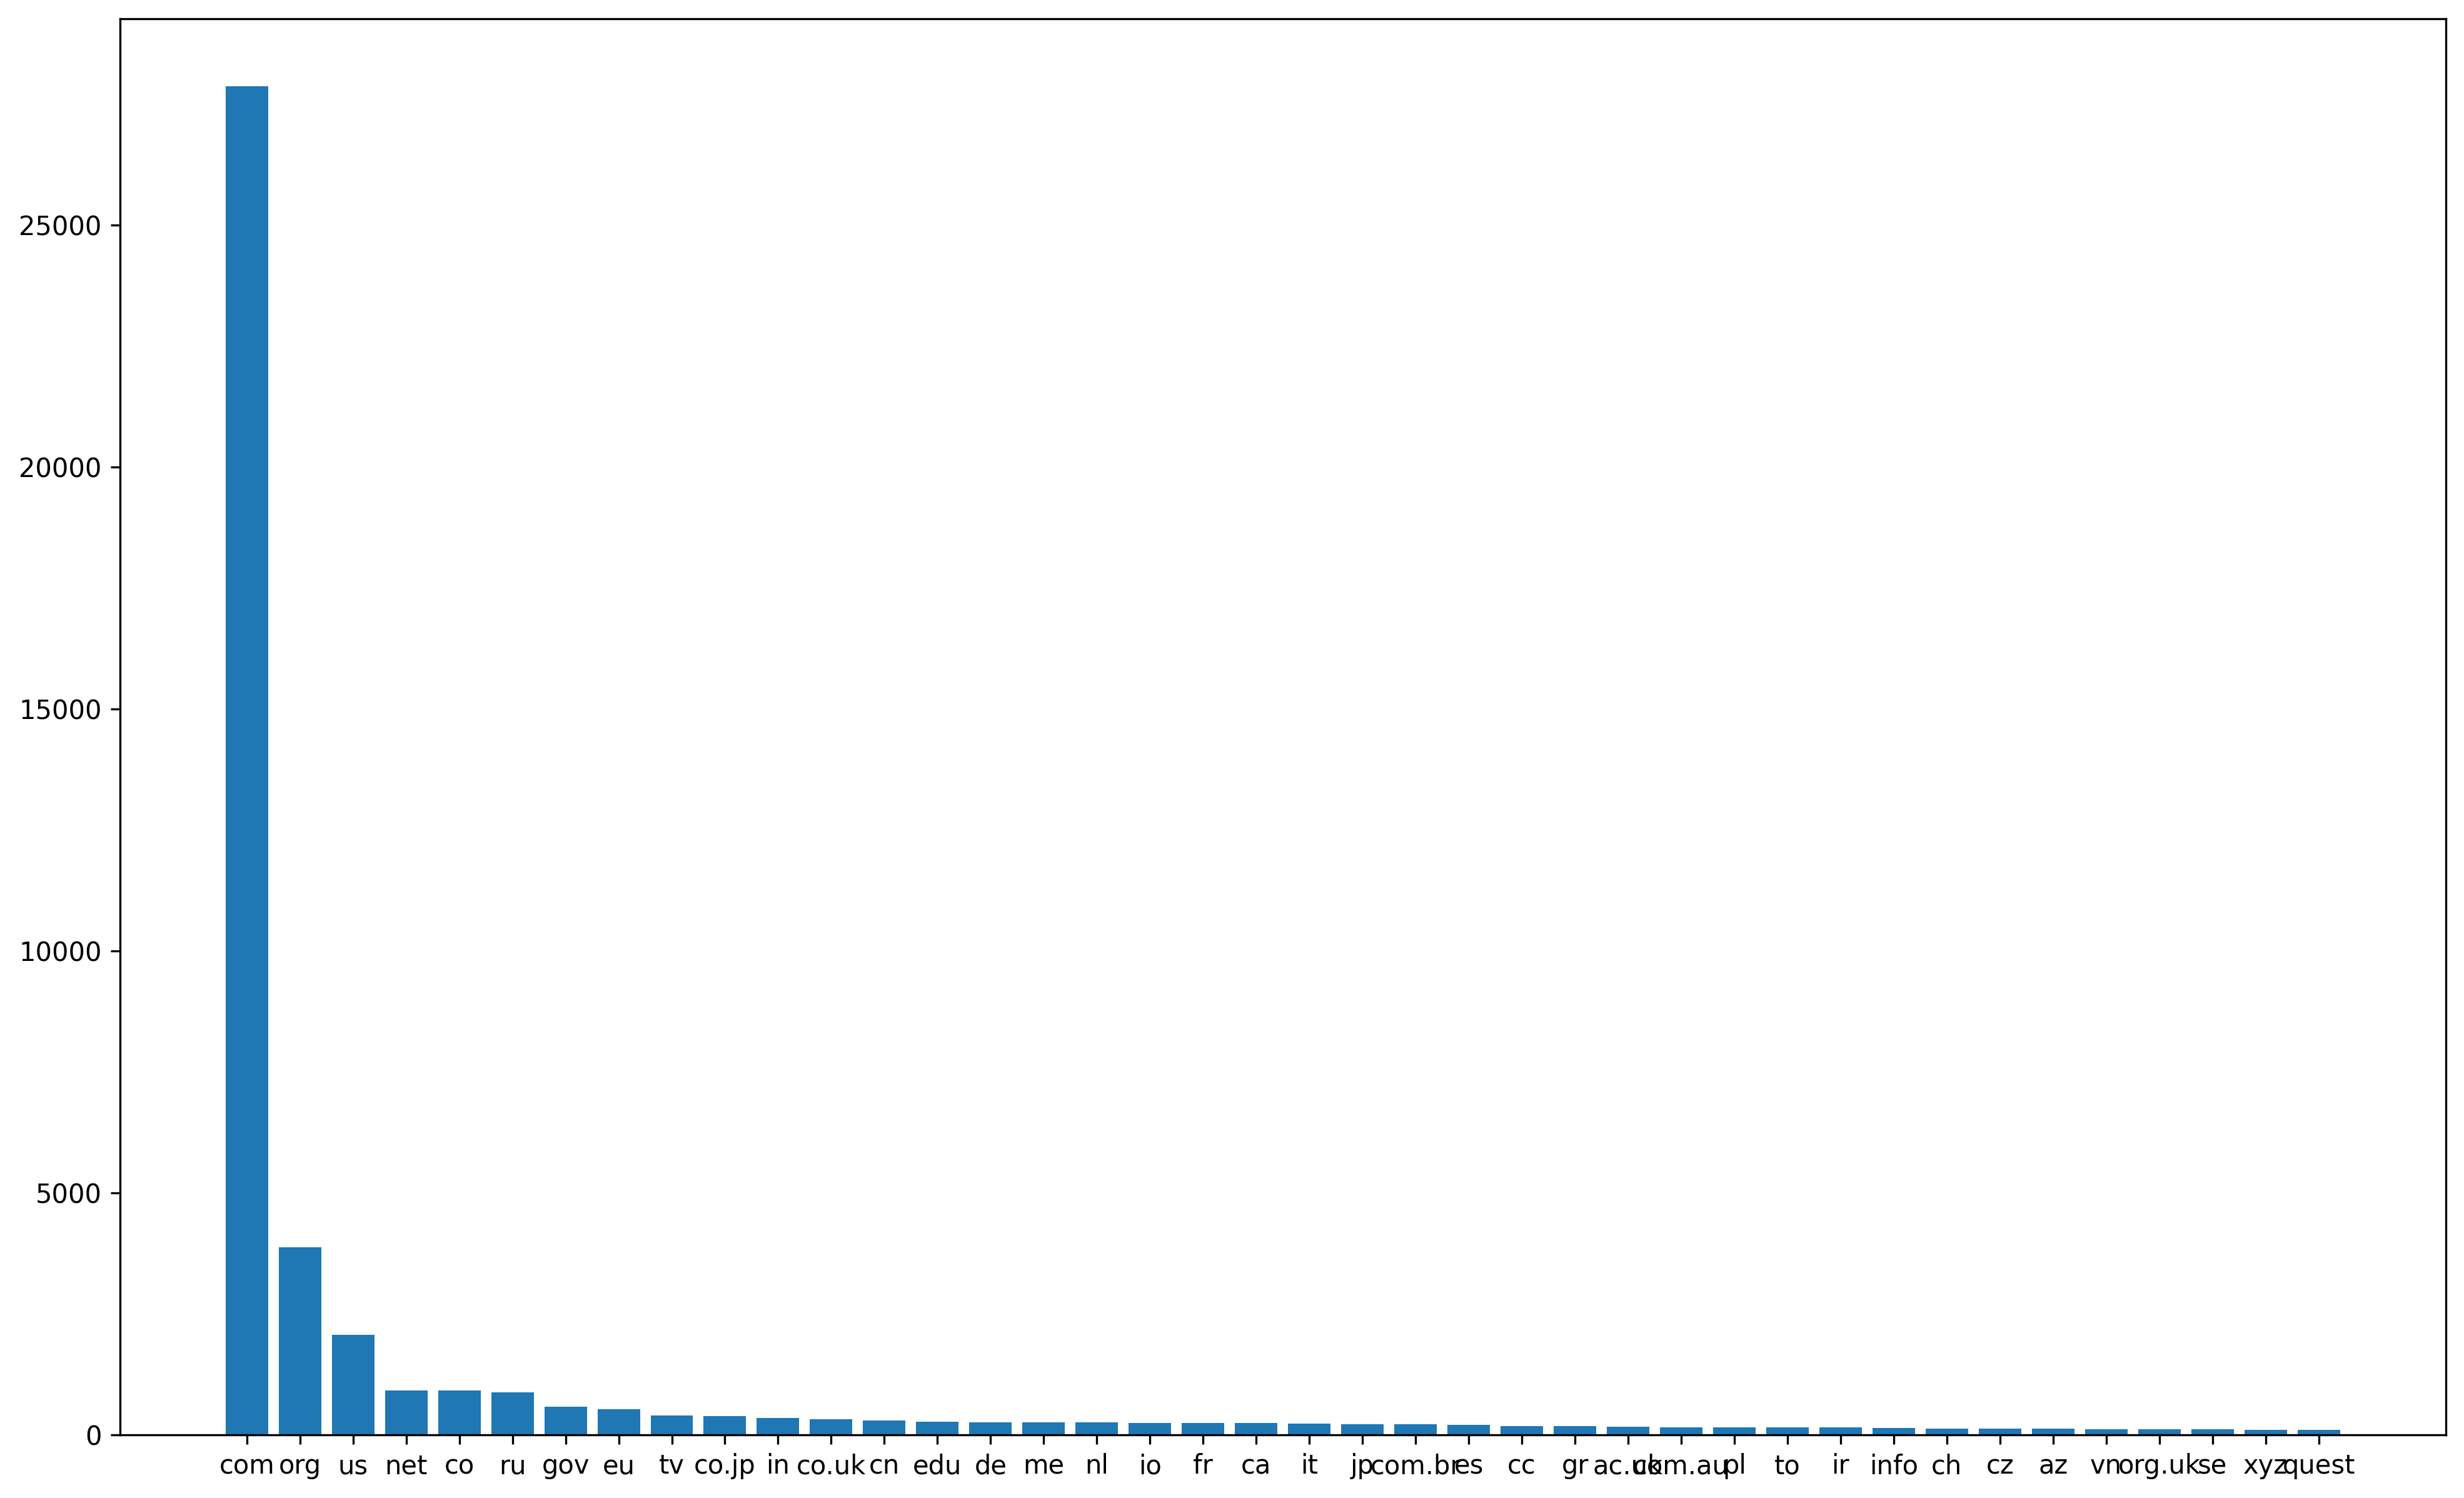

In [98]:
# Plot of the top 40.
plt.figure(figsize=(16,10), dpi=300)
height = df1["tld"].value_counts()
bars = df1["tld"].unique()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.savefig('data/images/graphs/tld_overview.png')
plt.show()

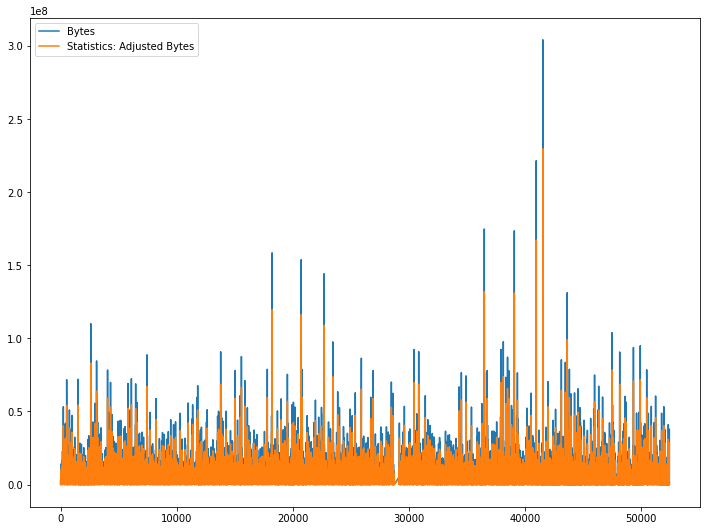

In [99]:
# Used for the 'Outliers' section of the thesis.
df[['Bytes', 'Statistics: Adjusted Bytes']].plot(figsize =(12, 9))
plt.savefig('data/images/graphs/bytes_and_adjusted_bytes.png')

# Domains
### Original

In [100]:
# The following code is used only for the Domains section of the thesis.
# Splits the dataset in the original 7 TLD's for the section that talks about them. Then combines only those tld's into merged_original.
com = df[df['URL'].str.contains('.com/', regex = False)]
gov = df[df['URL'].str.contains('.gov/', regex = False)]
org = df[df['URL'].str.contains('.org/', regex = False)]
net = df[df['URL'].str.contains('.net/', regex = False)]
edu = df[df['URL'].str.contains('.edu/', regex = False)]
int = df[df['URL'].str.contains('.int/', regex = False)]
mil = df[df['URL'].str.contains('.mil/', regex = False)]
original = [com, gov, org, net, edu, int, mil]
merged_original = pd.concat(original)

In [101]:
merged_original['tld'] = merged_original['URL'].apply(lambda x: get_tld(x))
merged_original['tld'] = merged_original['tld'].astype(str)
merged_original['tld'].value_counts()

com                   27873
org                    3868
net                    2065
edu                     921
gov                     387
int                      24
mil                       5
eu.com                    2
uk.com                    2
js.org                    1
us.com                    1
bplaced.net               1
duckdns.org               1
freedesktop.org           1
de.com                    1
mp                        1
altervista.org            1
cn.com                    1
herokuapp.com             1
pagexl.com                1
africa.com                1
pythonanywhere.com        1
us.org                    1
Name: tld, dtype: int64

<Figure size 4500x4500 with 0 Axes>

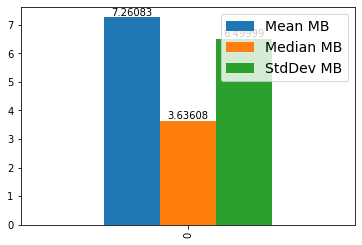

In [103]:
plt.figure(figsize=(15,15), dpi=300)
mean = (mil['Bytes'].mean() / 1e+6)
median = (mil['Bytes'].median() / 1e+6)
std = (mil['Bytes'].std() / 1e+6)
data = [mean, median, std]
dfmmms = pd.DataFrame(data)

ax = dfmmms.T.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
ax.legend(['Mean MB', 'Median MB', 'StdDev MB'], fontsize=14)
plt.savefig('data/images/graphs/tld_overview_bytes.png')
plt.show()

In [44]:
mil.Bytes.sum()

36304155

# Regional

In [64]:
eu = df[df['URL'].str.contains('.eu/', regex = False)] # EU
at = df[df['URL'].str.contains('.at/', regex = False)] # Austria
be = df[df['URL'].str.contains('.be/', regex = False)] # Belgium
bg = df[df['URL'].str.contains('.bg/', regex = False)] # Bulgaria
by = df[df['URL'].str.contains('.by/', regex = False)] # Belarus
hr = df[df['URL'].str.contains('.hr/', regex = False)] # Croatia
cz = df[df['URL'].str.contains('.cz/', regex = False)] # Czech Republic
de = df[df['URL'].str.contains('.de/', regex = False)] # Germany
dk = df[df['URL'].str.contains('.dk/', regex = False)] # Denmark
ee = df[df['URL'].str.contains('.ee/', regex = False)] # Estonia
es = df[df['URL'].str.contains('.es/', regex = False)] # Spain
fi = df[df['URL'].str.contains('.fi/', regex = False)] # Finland
fr = df[df['URL'].str.contains('.fr/', regex = False)] # France
gr = df[df['URL'].str.contains('.gr/', regex = False)] # Greece
hu = df[df['URL'].str.contains('.hu/', regex = False)] # Hungary
ie = df[df['URL'].str.contains('.ie/', regex = False)] # Ireland
it = df[df['URL'].str.contains('.it/', regex = False)] # Italy
lv = df[df['URL'].str.contains('.lv/', regex = False)] # Latvia
lt = df[df['URL'].str.contains('.lt/', regex = False)] # Lithuania
lu = df[df['URL'].str.contains('.lu/', regex = False)] # Luxembourg
mt = df[df['URL'].str.contains('.mt/', regex = False)] # Malta
uk = df[df['URL'].str.contains('.uk/', regex = False)] # United Kingdom
gb = df[df['URL'].str.contains('.gb/', regex = False)] # Great Britain
nl = df[df['URL'].str.contains('.nl/', regex = False)] # Netherlands
pl = df[df['URL'].str.contains('.pl/', regex = False)] # Poland
pt = df[df['URL'].str.contains('.pt/', regex = False)] # Portugal
ro = df[df['URL'].str.contains('.ro/', regex = False)] # Romania
sk = df[df['URL'].str.contains('.sk/', regex = False)] # Slovakia
si = df[df['URL'].str.contains('.si/', regex = False)] # Slovenia
se = df[df['URL'].str.contains('.se/', regex = False)] # Sweden

europe = [eu, at, be, bg, by, hr, cz, de, dk, ee, es, fi, fr, gr, hu, ie, it, lv, lt, lu, mt, uk, gb, nl, pl, pt, ro, sk, si, se]
merged_eu = pd.concat(europe)

In [73]:
merged_eu.head(1)

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Gathered At:,tld
55,https://european-union.europa.eu/select-langua...,False,235949,95.0,178141.495,0.000134,0.059398,0.033037,0.051496,0.028642,2022-05-04 15:24:23,eu


In [69]:
mean = (merged_eu['Bytes'].mean())
median = (merged_eu['Bytes'].median())
print(merged_eu['Bytes'].sum())
print(mean)
print(median)

14441057960
3270167.1105072466
2227436.0


In [74]:
mean = (merged_eu['Statistics: Energy (KWG)'].mean())
median = (merged_eu['Statistics: Energy (KWG)'].median())
print(merged_eu['Statistics: Energy (KWG)'].sum())
print(mean)
print(median)

8.22490918956489
0.0018625247258978466
0.00126863688770675


In [76]:
mean = (merged_eu['Statistics: CO2 Grams, Grid'].mean())
median = (merged_eu['Statistics: CO2 Grams, Grid'].median())
print(merged_eu['Statistics: CO2 Grams, Grid'].sum())
print(mean)
print(median)

3635.4098617877776
0.8232359288468699
0.5607375043664128


In [77]:
us = df[df['URL'].str.contains('.us/', regex = False)] # United States
ca = df[df['URL'].str.contains('.ca/', regex = False)] # Canada
mx = df[df['URL'].str.contains('.mx/', regex = False)] # Mexico
bz = df[df['URL'].str.contains('.bz/', regex = False)] # Belize
cr = df[df['URL'].str.contains('.cr/', regex = False)] # Costa Rica
sv = df[df['URL'].str.contains('.sv/', regex = False)] # El Salvador
gt = df[df['URL'].str.contains('.gt/', regex = False)] # Guatemala
hn = df[df['URL'].str.contains('.hn/', regex = False)] # Honduras
ni = df[df['URL'].str.contains('.ni/', regex = False)] # Nicaragua
pa = df[df['URL'].str.contains('.pa/', regex = False)] # Panama
pr = df[df['URL'].str.contains('.pr/', regex = False)] # Puerto Rico
cu = df[df['URL'].str.contains('.cu/', regex = False)] # Cuba
ht = df[df['URL'].str.contains('.ht/', regex = False)] # Haiti
jm = df[df['URL'].str.contains('.jm/', regex = False)] # Jamaica
tr = df[df['URL'].str.contains('.tt/', regex = False)] # Trinidad and Tobago
bs = df[df['URL'].str.contains('.bs/', regex = False)] # Bahamas
bb = df[df['URL'].str.contains('.bb/', regex = False)] # Barbados
lc = df[df['URL'].str.contains('.lc/', regex = False)] # Saint Lucia
gd = df[df['URL'].str.contains('.gd/', regex = False)] # Grenada
ag = df[df['URL'].str.contains('.ag/', regex = False)] # Antigua and Barbuda
dm = df[df['URL'].str.contains('.dm/', regex = False)] # Dominica
sk = df[df['URL'].str.contains('.kn/', regex = False)] # Saint Kitts and Nevis
north_america = [us, ca, mx, bz, cr, sv, gt, hn, ni, pa, pr, cu, ht, jm, tr, bs, bb, lc, gd, ag, dm, sk]
merged_na = pd.concat(north_america)

In [79]:
mean = (merged_na['Bytes'].mean())
median = (merged_na['Bytes'].median())
print(merged_na['Bytes'].sum())
print(mean)
print(median)

2452139100
3638188.5756676556
2417261.5


In [81]:
mean = (merged_na['Statistics: Energy (KWG)'].mean())
median = (merged_na['Statistics: Energy (KWG)'].median())
print(merged_na['Statistics: Energy (KWG)'].sum())
print(mean)
print(median)

1.396616610330498
0.002072131469333083
0.00137675206207195


In [82]:
mean = (merged_na['Statistics: CO2 Grams, Grid'].mean())
median = (merged_na['Statistics: CO2 Grams, Grid'].median())
print(merged_na['Statistics: CO2 Grams, Grid'].sum())
print(mean)
print(median)

617.304541766094
0.9158821094452433
0.6085244114358445


In [83]:
ar = df[df['URL'].str.contains('.ar/', regex = False)] # Argentina
bo = df[df['URL'].str.contains('.bo/', regex = False)] # Bolivia
br = df[df['URL'].str.contains('.br/', regex = False)] # Brazil
cl = df[df['URL'].str.contains('.cl/', regex = False)] # Chile
co = df[df['URL'].str.contains('.co/', regex = False)] # Colombia
ec = df[df['URL'].str.contains('.ec/', regex = False)] # Ecuador
gy = df[df['URL'].str.contains('.gy/', regex = False)] # Guyana
pa = df[df['URL'].str.contains('.pa/', regex = False)] # Panama
pe = df[df['URL'].str.contains('.pe/', regex = False)] # Peru
py = df[df['URL'].str.contains('.py/', regex = False)] # Paraguay
sr = df[df['URL'].str.contains('.sr/', regex = False)] # Suriname
tt = df[df['URL'].str.contains('.tt/', regex = False)] # Trinidad and Tobago
uy = df[df['URL'].str.contains('.uy/', regex = False)] # Uruguay
ve = df[df['URL'].str.contains('.ve/', regex = False)] # Venezuela
south_america = [ar, bo, br, cl, co, ec, gy, pa, pe, py, sr, tt, uy, ve]
merged_sa = pd.concat(south_america)

In [84]:
mean = (merged_sa['Bytes'].mean())
median = (merged_sa['Bytes'].median())
print(merged_sa['Bytes'].sum())
print(mean)
print(median)

3473422760
4105700.661938534
2688467.0


In [85]:
mean = (merged_sa['Statistics: Energy (KWG)'].mean())
median = (merged_sa['Statistics: Energy (KWG)'].median())
print(merged_sa['Statistics: Energy (KWG)'].sum())
print(mean)
print(median)

1.9782890462111276
0.0023384031279091344
0.0015312172415199998


In [87]:
mean = (merged_sa['Statistics: CO2 Grams, Grid'].mean())
median = (merged_sa['Statistics: CO2 Grams, Grid'].median())
print(merged_sa['Statistics: CO2 Grams, Grid'].sum())
print(mean)
print(median)

874.4037584253363
1.0335741825358584
0.6767980207518676


In [88]:
asia = df[df['URL'].str.contains('.asia/', regex = False)] # Asia
ru = df[df['URL'].str.contains('.ru/', regex = False)] # Russia
cn = df[df['URL'].str.contains('.cn/', regex = False)] # China
jp = df[df['URL'].str.contains('.jp/', regex = False)] # Japan
kr = df[df['URL'].str.contains('.kr/', regex = False)] # Korea
tw = df[df['URL'].str.contains('.tw/', regex = False)] # Taiwan
hk = df[df['URL'].str.contains('.hk/', regex = False)] # Hong Kong
id = df[df['URL'].str.contains('.id/', regex = False)] # Indonesia
my = df[df['URL'].str.contains('.my/', regex = False)] # Malaysia
ph = df[df['URL'].str.contains('.ph/', regex = False)] # Philippines
sg = df[df['URL'].str.contains('.sg/', regex = False)] # Singapore
th = df[df['URL'].str.contains('.th/', regex = False)] # Thailand
vn = df[df['URL'].str.contains('.vn/', regex = False)] # Vietnam
id = df[df['URL'].str.contains('.in/', regex = False)] # India
kp = df[df['URL'].str.contains('.kp/', regex = False)] # North Korea
vn = df[df['URL'].str.contains('.vn/', regex = False)] # Vietnam
af = df[df['URL'].str.contains('.af/', regex = False)] # Afghanistan
am = df[df['URL'].str.contains('.am/', regex = False)] # Armenia
az = df[df['URL'].str.contains('.az/', regex = False)] # Azerbaijan
bd = df[df['URL'].str.contains('.bd/', regex = False)] # Bangladesh
bt = df[df['URL'].str.contains('.bt/', regex = False)] # Bhutan
bn = df[df['URL'].str.contains('.bn/', regex = False)] # Brunei
kh = df[df['URL'].str.contains('.kh/', regex = False)] # Cambodia

list_asia = [asia, ru, cn, jp, kr, tw, hk, id, my, ph, sg, th, vn, id, kp, vn, af, am, az, bd, bt, bn, kh]
merged_asia = pd.concat(list_asia)


In [89]:
mean = (merged_asia['Bytes'].mean())
median = (merged_asia['Bytes'].median())
print(merged_asia['Bytes'].sum())
print(mean)
print(median)

17369233191
4705833.972094283
2983901.0


In [90]:
mean = (merged_asia['Statistics: Energy (KWG)'].mean())
median = (merged_asia['Statistics: Energy (KWG)'].median())
print(merged_asia['Statistics: Energy (KWG)'].sum())
print(mean)
print(median)

9.892652330878992
0.0026802092470547254
0.0016994817709084


In [91]:
mean = (merged_asia['Statistics: CO2 Grams, Grid'].mean())
median = (merged_asia['Statistics: CO2 Grams, Grid'].median())
print(merged_asia['Statistics: CO2 Grams, Grid'].sum())
print(mean)
print(median)

4372.552330248593
1.1846524871982098
0.7511709427415393


In [92]:
ae = df[df['URL'].str.contains('.ae/', regex = False)] # United Arab Emirates
sa = df[df['URL'].str.contains('.sa/', regex = False)] # Saudi Arabia
bh = df[df['URL'].str.contains('.bh/', regex = False)] # Bahrain
iq = df[df['URL'].str.contains('.iq/', regex = False)] # Iraq
jo = df[df['URL'].str.contains('.jo/', regex = False)] # Jordan
kw = df[df['URL'].str.contains('.kw/', regex = False)] # Kuwait
lb = df[df['URL'].str.contains('.lb/', regex = False)] # Lebanon
om = df[df['URL'].str.contains('.om/', regex = False)] # Oman
qa = df[df['URL'].str.contains('.qa/', regex = False)] # Qatar
sy = df[df['URL'].str.contains('.sy/', regex = False)] # Syria
tr = df[df['URL'].str.contains('.tr/', regex = False)] # Turkey
ir = df[df['URL'].str.contains('.ir/', regex = False)] # Iran
il = df[df['URL'].str.contains('.il/', regex = False)] # Israel

middle_east = [ae, sa, bh, iq, jo, kw, lb, om, qa, sy, tr, ir, il]
merged_middle = pd.concat(middle_east)

In [94]:
mean = (merged_middle['Bytes'].mean())
median = (merged_middle['Bytes'].median())
print(merged_middle['Bytes'].sum())
print(mean)
print(median)

2234840438
4560898.853061224
2830944.5


In [95]:
mean = (merged_middle['Statistics: Energy (KWG)'].mean())
median = (merged_middle['Statistics: Energy (KWG)'].median())
print(merged_middle['Statistics: Energy (KWG)'].sum())
print(mean)
print(median)

1.2728540877428605
0.002597661403556858
0.00161236534730995


In [96]:
mean = (merged_middle['Statistics: CO2 Grams, Grid'].mean())
median = (merged_middle['Statistics: CO2 Grams, Grid'].median())
print(merged_middle['Statistics: CO2 Grams, Grid'].sum())
print(mean)
print(median)

562.6015067823546
1.1481663403721523
0.7126654835110064


In [97]:
au = df[df['URL'].str.contains('.au/', regex = False)]
nz = df[df['URL'].str.contains('.nz/', regex = False)]
fiji = df[df['URL'].str.contains('.fj/', regex = False)]
amersam = df[df['URL'].str.contains('.as/', regex = False)]
guam = df[df['URL'].str.contains('.gu/', regex = False)]

oceania = [au, nz, fiji, amersam, guam]
merged_oa = pd.concat(oceania)

In [98]:
mean = (merged_oa['Bytes'].mean())
median = (merged_oa['Bytes'].median())
print(merged_oa['Bytes'].sum())
print(mean)
print(median)

1473186537
3664643.1268656715
2987385.0


In [99]:
mean = (merged_oa['Statistics: Energy (KWG)'].mean())
median = (merged_oa['Statistics: Energy (KWG)'].median())
print(merged_oa['Statistics: Energy (KWG)'].sum())
print(mean)
print(median)

0.8390538643135957
0.0020871986674467556
0.0017014660842250501


In [100]:
mean = (merged_oa['Statistics: CO2 Grams, Grid'].mean())
median = (merged_oa['Statistics: CO2 Grams, Grid'].median())
print(merged_oa['Statistics: CO2 Grams, Grid'].sum())
print(mean)
print(median)

370.86180802661806
0.9225418110114877
0.7520480092274957


In [101]:
ao = df[df['URL'].str.contains('.ao/', regex = False)] # Angola
bf = df[df['URL'].str.contains('.bf/', regex = False)] # Burkina Faso
bi = df[df['URL'].str.contains('.bi/', regex = False)] # Burundi
bj = df[df['URL'].str.contains('.bj/', regex = False)] # Benin
bw = df[df['URL'].str.contains('.bw/', regex = False)] # Botswana
cd = df[df['URL'].str.contains('.cd/', regex = False)] # Congo
cf = df[df['URL'].str.contains('.cf/', regex = False)] # Central African Republic
cg = df[df['URL'].str.contains('.cg/', regex = False)] # Congo
ci = df[df['URL'].str.contains('.ci/', regex = False)] # Cote d'Ivoire
cm = df[df['URL'].str.contains('.cm/', regex = False)] # Cameroon
cv = df[df['URL'].str.contains('.cv/', regex = False)] # Cape Verde
dj = df[df['URL'].str.contains('.dj/', regex = False)] # Djibouti
dz = df[df['URL'].str.contains('.dz/', regex = False)] # Algeria
eg = df[df['URL'].str.contains('.eg/', regex = False)] # Egypt
er = df[df['URL'].str.contains('.er/', regex = False)] # Eritrea
et = df[df['URL'].str.contains('.et/', regex = False)] # Ethiopia
ga = df[df['URL'].str.contains('.ga/', regex = False)] # Gabon
gh = df[df['URL'].str.contains('.gh/', regex = False)] # Ghana
gm = df[df['URL'].str.contains('.gm/', regex = False)] # Gambia
gn = df[df['URL'].str.contains('.gn/', regex = False)] # Guinea
gw = df[df['URL'].str.contains('.gw/', regex = False)] # Guinea-Bissau
ke = df[df['URL'].str.contains('.ke/', regex = False)] # Kenya
km = df[df['URL'].str.contains('.km/', regex = False)] # Comoros
lr = df[df['URL'].str.contains('.lr/', regex = False)] # Liberia
ls = df[df['URL'].str.contains('.ls/', regex = False)] # Lesotho
ly = df[df['URL'].str.contains('.ly/', regex = False)] # Libya
ma = df[df['URL'].str.contains('.ma/', regex = False)] # Morocco
mg = df[df['URL'].str.contains('.mg/', regex = False)] # Madagascar
ml = df[df['URL'].str.contains('.ml/', regex = False)] # Mali
mr = df[df['URL'].str.contains('.mr/', regex = False)] # Mauritania
mu = df[df['URL'].str.contains('.mu/', regex = False)] # Mauritius
mw = df[df['URL'].str.contains('.mw/', regex = False)] # Malawi
mz = df[df['URL'].str.contains('.mz/', regex = False)] # Mozambique
na = df[df['URL'].str.contains('.na/', regex = False)] # Namibia
ne = df[df['URL'].str.contains('.ne/', regex = False)] # Niger
ng = df[df['URL'].str.contains('.ng/', regex = False)] # Nigeria
rw = df[df['URL'].str.contains('.rw/', regex = False)] # Rwanda
sc = df[df['URL'].str.contains('.sc/', regex = False)] # Seychelles
sd = df[df['URL'].str.contains('.sd/', regex = False)] # Sudan
sl = df[df['URL'].str.contains('.sl/', regex = False)] # Sierra Leone
sn = df[df['URL'].str.contains('.sn/', regex = False)] # Senegal
so = df[df['URL'].str.contains('.so/', regex = False)] # Somalia
ss = df[df['URL'].str.contains('.ss/', regex = False)] # South Sudan
st = df[df['URL'].str.contains('.st/', regex = False)] # Sao Tome and Principe
sz = df[df['URL'].str.contains('.sz/', regex = False)] # Swaziland
tg = df[df['URL'].str.contains('.tg/', regex = False)] # Togo
tn = df[df['URL'].str.contains('.tn/', regex = False)] # Tunisia
tz = df[df['URL'].str.contains('.tz/', regex = False)] # Tanzania
ug = df[df['URL'].str.contains('.ug/', regex = False)] # Uganda
zm = df[df['URL'].str.contains('.zm/', regex = False)] # Zambia
zw = df[df['URL'].str.contains('.zw/', regex = False)] # Zimbabwe

africa = [ao, bf, bi, bj, bw, cd, cf, cg, ci, cm, cv, dj, dz, eg, er, et, ga, gh, gm, gn, gw, ke, km, lr, ls, ly, ma, mg, ml, mr, mu, mw, mz, na, ne, ng, rw, sc, sd, sl, sn, so, ss, st, sz, tg, tn, tz, ug, zm, zw]
merged_africa = pd.concat(africa)

In [102]:
mean = (merged_africa['Bytes'].mean())
median = (merged_africa['Bytes'].median())
print(merged_africa['Bytes'].sum())
print(mean)
print(median)

1072575474
5012034.925233644
1785143.5


In [103]:
mean = (merged_africa['Statistics: Energy (KWG)'].mean())
median = (merged_africa['Statistics: Energy (KWG)'].median())
print(merged_africa['Statistics: Energy (KWG)'].sum())
print(mean)
print(median)

0.6108857049836691
0.0028546060980545285
0.00101672905257435


In [104]:
mean = (merged_africa['Statistics: CO2 Grams, Grid'].mean())
median = (merged_africa['Statistics: CO2 Grams, Grid'].median())
print(merged_africa['Statistics: CO2 Grams, Grid'].sum())
print(mean)
print(median)

270.0114816027856
1.2617358953401194
0.44939424123787314


In [45]:
df["Statistics: CO2 Grams, Grid"].sort_values()

40633     0.000042
1594      0.000043
24137     0.000047
25294     0.000050
20385     0.000052
           ...    
18209    39.883307
39068    43.674190
36484    43.990847
40959    55.743450
41527    76.550528
Name: Statistics: CO2 Grams, Grid, Length: 50034, dtype: float64

In [46]:
df["Statistics: CO2 Grams, Grid"].median()

0.562928282521991

In [47]:
pd.pivot_table(data=df, index=['Green Hosting'], aggfunc=np.sum)

,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,"Statistics: CO2 Grams, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Grid","Statistics: CO2 Litres, Renewable",Statistics: Energy (KWG)
Green Hosting,,,,,,,,
False,104068160248,1117493.0,7.857146e+10,26198.247878,22713.051102,14571.46547,12632.999023,59.272054
True,80863090299,1341892.0,6.105163e+10,20356.574757,17648.505536,11322.32688,9816.098779,46.055599


#### For "Top/Bottom 1000"

In [48]:
first1000 = df.head(1000)
last1000 = df.tail(1000)

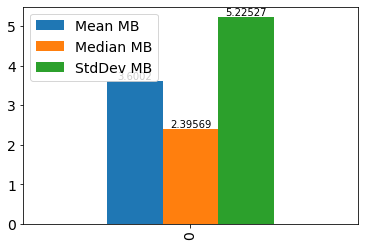

In [49]:
mean = (first1000['Bytes'].mean() / 1e+6)
median = (first1000['Bytes'].median() / 1e+6)
std = (first1000['Bytes'].std() / 1e+6)
data = [mean, median, std]
dfmmms = pd.DataFrame(data)

ax = dfmmms.T.plot(kind='bar', fontsize = 14)
for container in ax.containers:
    ax.bar_label(container)
ax.legend(['Mean MB', 'Median MB', 'StdDev MB'], fontsize = 14)
plt.savefig('images/graphs/top1000_sizes.png')
plt.show()


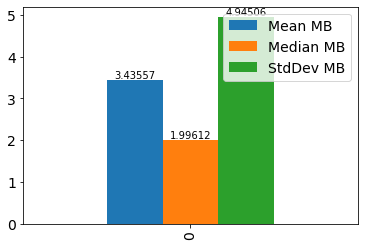

In [50]:
mean = (last1000['Bytes'].mean() / 1e+6)
median = (last1000['Bytes'].median() / 1e+6)
std = (last1000['Bytes'].std() / 1e+6)
data = [mean, median, std]
dfmmms = pd.DataFrame(data)

ax = dfmmms.T.plot(kind='bar', fontsize = 14)
for container in ax.containers:
    ax.bar_label(container)
ax.legend(['Mean MB', 'Median MB', 'StdDev MB'], fontsize = 14)
plt.savefig('images/graphs/bottom1000_sizes.png')
plt.show()

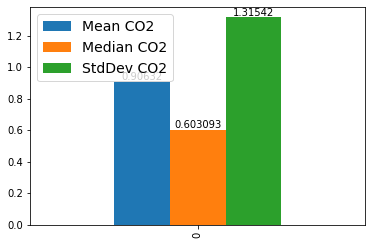

In [51]:
mean = (first1000['Statistics: CO2 Grams, Grid'].mean())
median = (first1000['Statistics: CO2 Grams, Grid'].median())
std = (first1000['Statistics: CO2 Grams, Grid'].std())
data = [mean, median, std]
dfmmms = pd.DataFrame(data)

ax = dfmmms.T.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
ax.legend(['Mean CO2', 'Median CO2', 'StdDev CO2'], fontsize = 14)
plt.savefig('images/graphs/top1000_co2s.png')
plt.show()

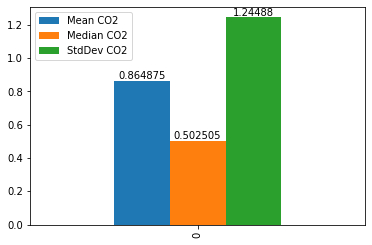

In [52]:
mean = (last1000['Statistics: CO2 Grams, Grid'].mean())
median = (last1000['Statistics: CO2 Grams, Grid'].median())
std = (last1000['Statistics: CO2 Grams, Grid'].std())
data = [mean, median, std]
dfmmms = pd.DataFrame(data)

ax = dfmmms.T.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
ax.legend(['Mean CO2', 'Median CO2', 'StdDev CO2'])
plt.savefig('images/graphs/bottom1000_co2s.png')
plt.show()

### For "Hosting Type"

In [53]:
ghtable = pd.pivot_table(data=df, index=['Green Hosting'], aggfunc=np.sum)

In [54]:
ghtable = ghtable.reindex(columns=['Bytes', 'Statistics: Energy (KWG)', 'Statistics: CO2 Grams, Grid', 'Statistics: CO2 Litres, Grid'])
ghtable

,Bytes,Statistics: Energy (KWG),"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid"
Green Hosting,,,,
False,104068160248,59.272054,26198.247878,14571.46547
True,80863090299,46.055599,20356.574757,11322.32688


In [55]:
df["Green Hosting"].value_counts()

False    25708
True     24326
Name: Green Hosting, dtype: int64

# Splitting

<AxesSubplot:>

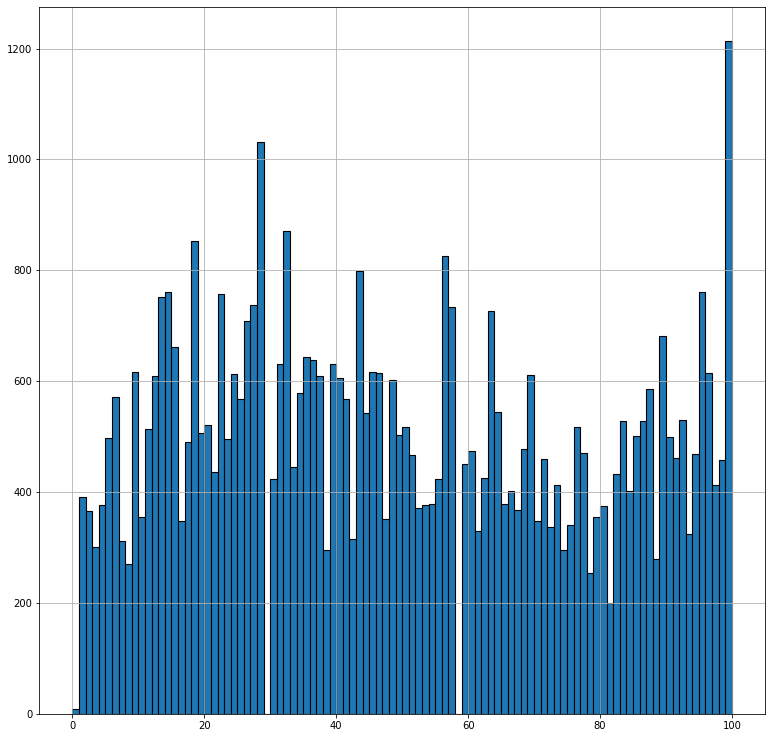

In [56]:
df["Cleaner Than %"].hist(bins=100, edgecolor='black', linewidth=1.1, figsize=(13,13))

# Other Charts

array([[<AxesSubplot:title={'center':'Bytes'}>,
        <AxesSubplot:title={'center':'Cleaner Than %'}>,
        <AxesSubplot:title={'center':'Statistics: Adjusted Bytes'}>],
       [<AxesSubplot:title={'center':'Statistics: Energy (KWG)'}>,
        <AxesSubplot:title={'center':'Statistics: CO2 Grams, Grid'}>,
        <AxesSubplot:title={'center':'Statistics: CO2 Litres, Grid'}>],
       [<AxesSubplot:title={'center':'Statistics: CO2 Grams, Renewable'}>,
        <AxesSubplot:title={'center':'Statistics: CO2 Litres, Renewable'}>,
        <AxesSubplot:>]], dtype=object)

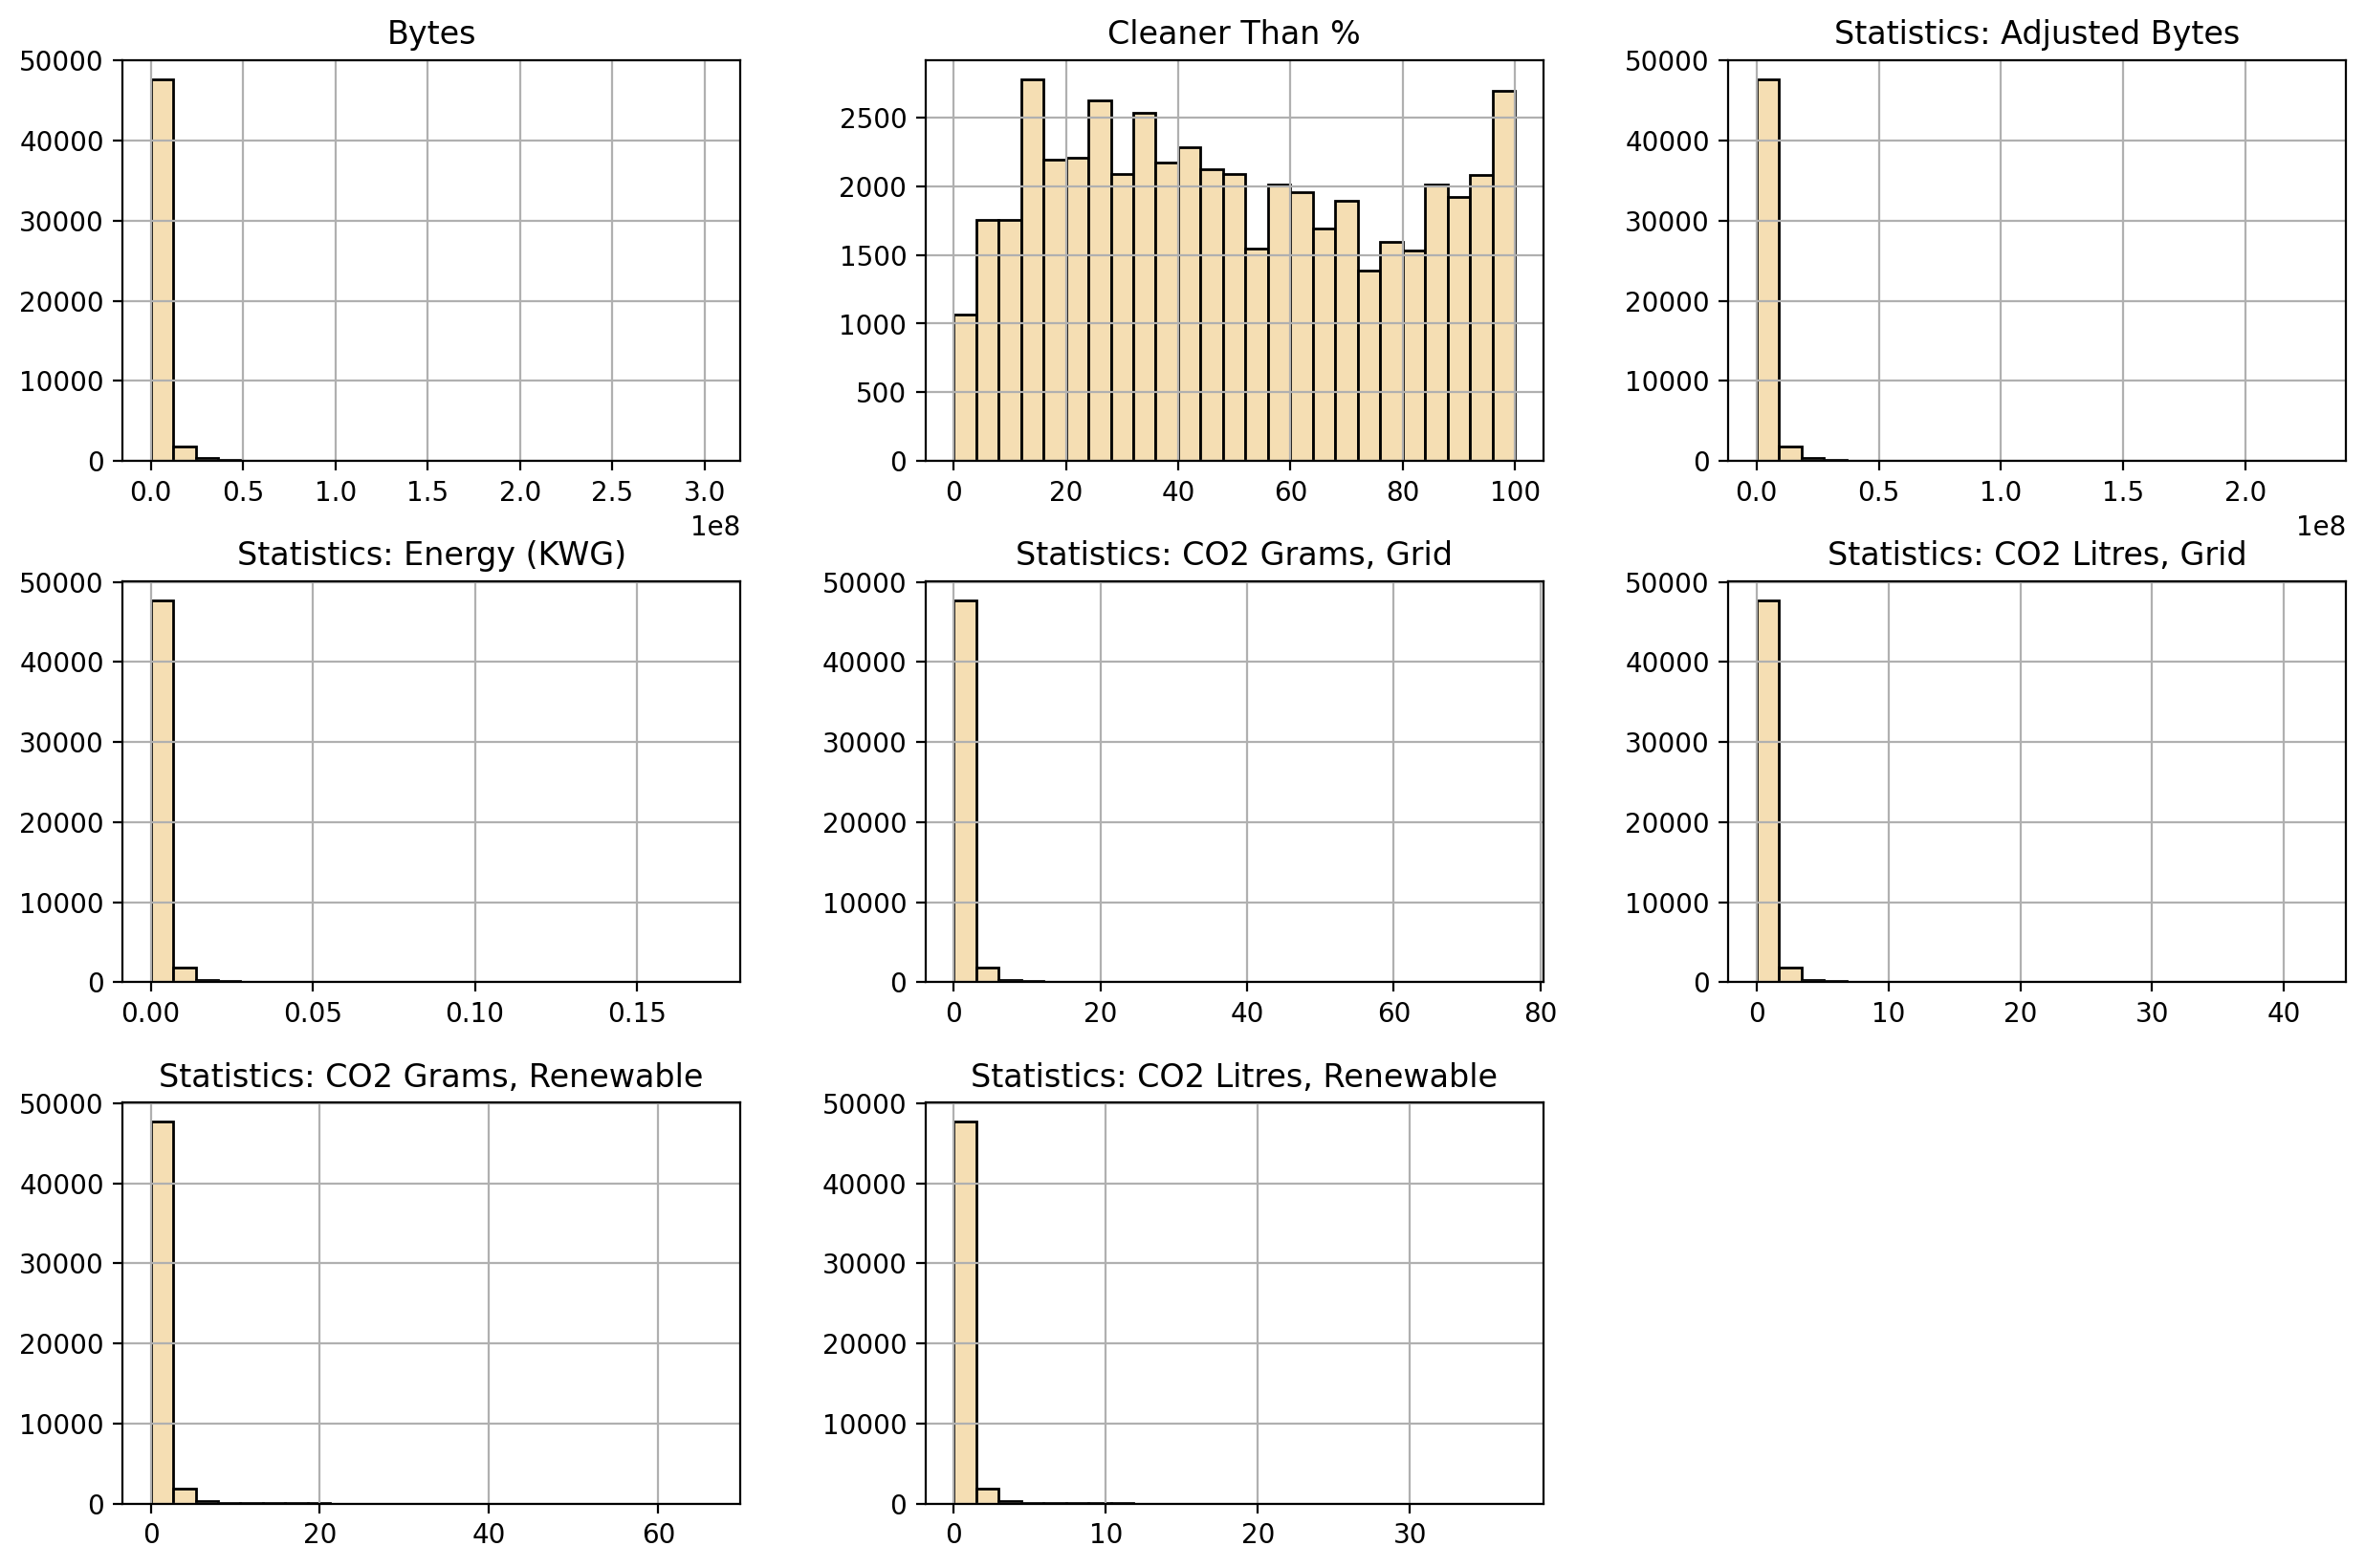

In [61]:
dfchart = df.iloc[:, :10]
fig = plt.figure(figsize=(15, 10), dpi=200)
ax = fig.gca()
dfchart.hist(ax=ax, facecolor='wheat', bins=25, edgecolor='black')